In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import yfinance as yf
%matplotlib widget

sns.set_style("darkgrid")
sns.set(font_scale=1.7)

In [15]:
buy_ticker = "GDDY"
sell_ticker = "ABT"
ticker1 = yf.Ticker(buy_ticker)
ticker2 = yf.Ticker(sell_ticker)
dataFrame1 = ticker1.history(
    start='2017-1-1', actions=True, rounding=True)
dataFrame2 = ticker2.history(
    start='2017-1-1', actions=True, rounding=True)

ratio = pd.DataFrame(dataFrame1.Close / dataFrame2.Close)
spread = pd.DataFrame( dataFrame1.Close - dataFrame2.Close)

In [11]:
ratio["MA50"] = ratio.Close.rolling(50).mean()
ratio["Min50"] = ratio.Close.rolling(50).min()
ratio["Max50"] = ratio.Close.rolling(50).max()
ratio["UpperBand"] = (ratio.Close.rolling(50).mean()) + \
    (ratio["Close"].rolling(50).std())
ratio["LowerBand"] = (ratio.Close.rolling(50).mean()) - \
    (ratio["Close"].rolling(50).std())
ratio["EMA50"] = ratio.Close.ewm(span=26, adjust=False).mean()
ratio["EMA20"] = ratio.Close.ewm(span=12, adjust=False).mean()
ratio["MACD"] = ratio["EMA20"] - ratio["EMA50"]
ratio["MACD signal"] = ratio["MACD"].ewm(span=9, adjust=False).mean()


In [12]:
z_score = (ratio - ratio.mean())/ratio.std()

mean_Mavg100 = z_score.rolling(window=100, center=False).mean()
mean_Mavg50 = z_score.rolling(window=50, center=False).mean()


NameError: name 'UpperBand' is not defined

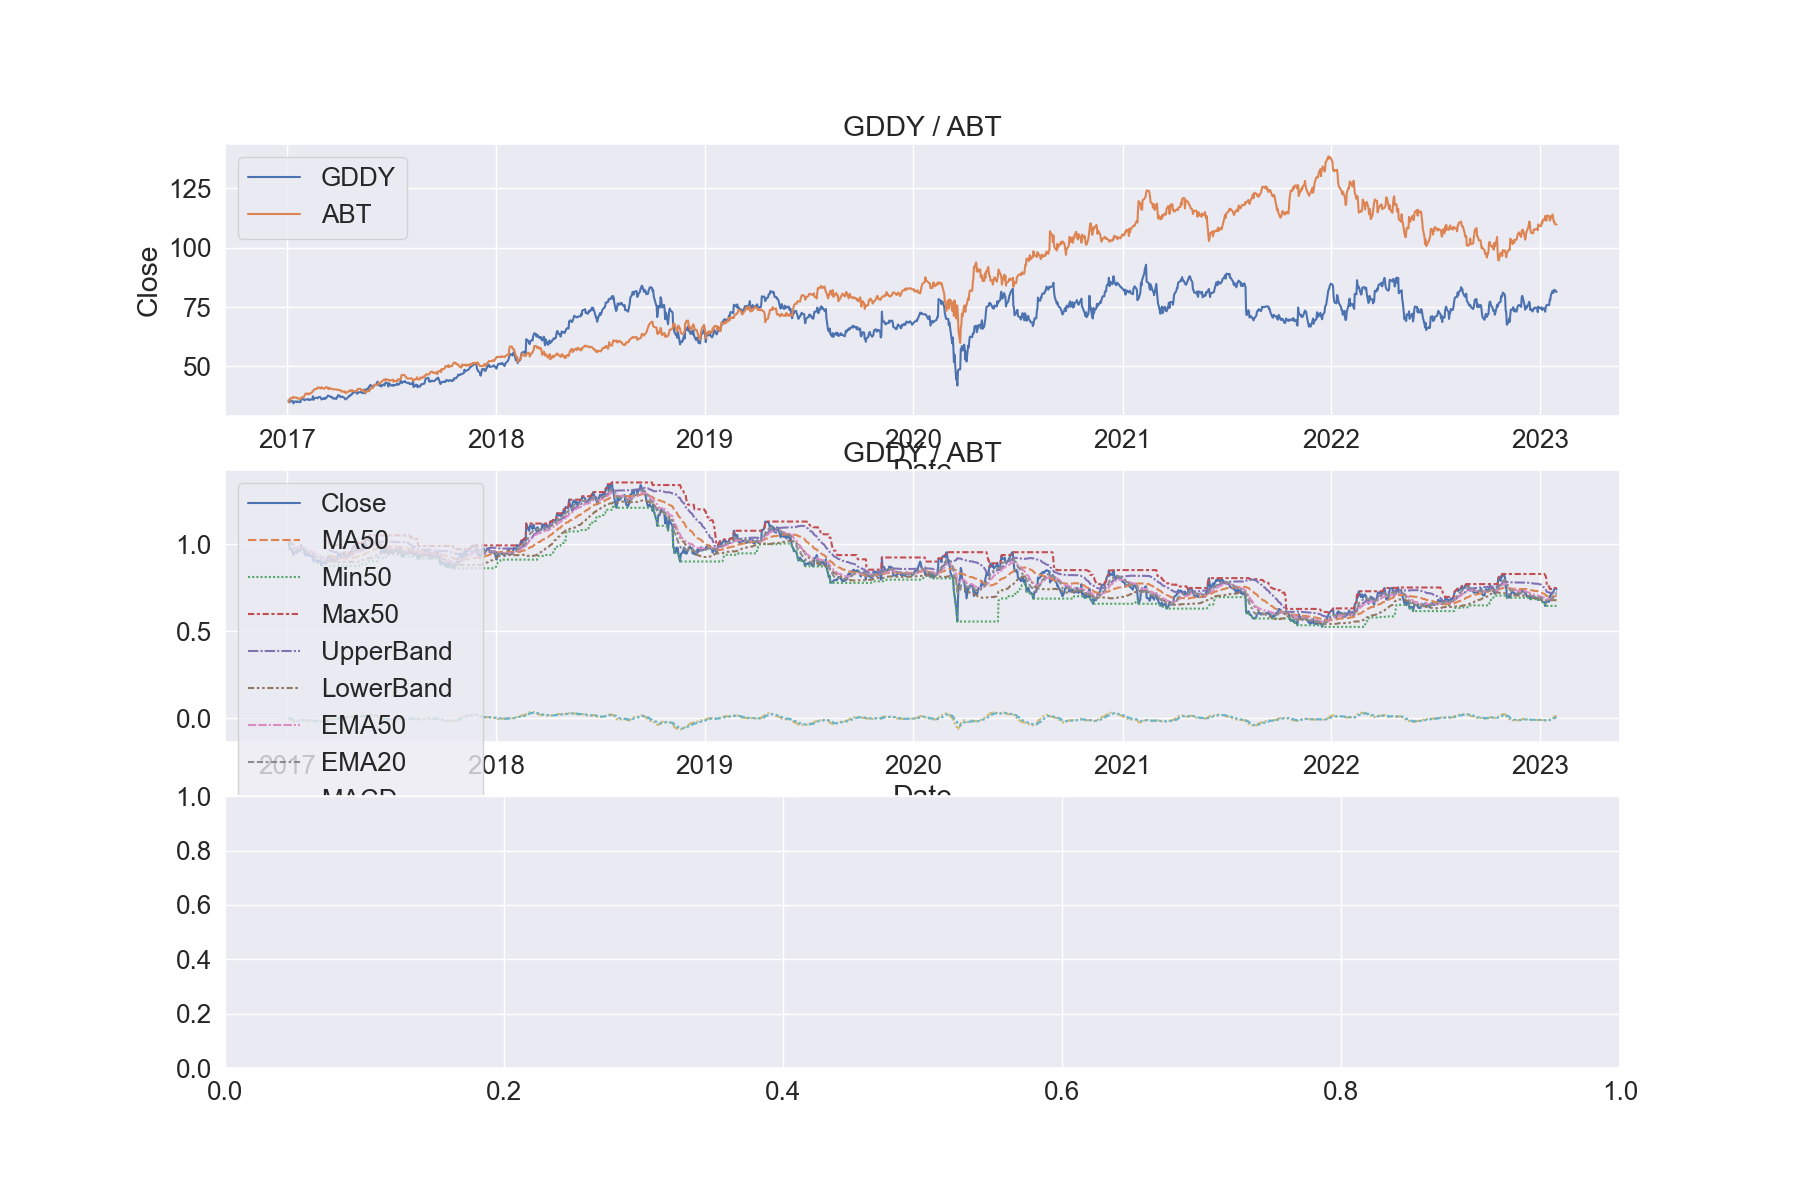

In [14]:
fig, axes = plt.subplots(3, figsize=(18, 12))

axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=dataFrame1, x="Date", y="Close",
             ax=axes[0], label=buy_ticker)
sns.lineplot(data=dataFrame2, x="Date", y="Close",
             ax=axes[0], label=sell_ticker)

axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=ratio, ax=axes[1])
sns.lineplot(data=UpperBand, ax=axes[1])
sns.lineplot(data=LowerBand, ax=axes[1])
axes[1].axhline(y=stop_loss[-1], linewidth=2, color='r', linestyle='dotted')
axes[1].axhline(y=Entry, linewidth=2, color='g', linestyle='dotted')
axes[1].axhline(y=Target, linewidth=2, color='b', linestyle='dotted')

axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=spread, ax=axes[2])


plt.tight_layout(pad=1)
